In [1]:
from latools import *
from sympy import *
init_printing(use_latex=True)
import random

In [2]:
def gram_schmidt(ulist):
    vlist = [ulist[0]]
    n, _ = ulist[0].shape
    for u in ulist[1:]:
        vlist.append(u - sum([u.dot(v)/v.dot(v)*v for v in vlist], zeros(n, 1)))
    return vlist

def random_invertible_matrix(n, cvalues=[-1,1], determinant=1):
    P = eye(n)
    P[0,:] *= determinant
    for i in range(n):
        for j in range(n):
            if i==j:
                continue
            P[j,:] += random.choice(cvalues)*P[i,:]
            P[:,j] += random.choice(cvalues)*P[:,i]        
    return P

def vector_to_latex(v, align='r'):
    strout = '\\begin{{bmatrix*}}[{}]'.format(align)
    for elem in v:
        strout += '{}\\\\ '.format(latex(elem))
    strout +='\\end{bmatrix*}'
    return strout

def matrix_to_latex(A, align='r'):
    n, m = A.shape
    strout = '\\begin{{bmatrix*}}[{}]'.format(align)
    for i in range(n):
        strout += '&'.join([latex(entry) for entry in A[i,:]]) + '\\\\'
    strout += '\\end{bmatrix*}'
    return strout

# Problem 1

In [25]:
def determine_if_vector_in_span(dim, nvec, min=-3, max=3, cmin=-5, cmax=5):
    ulist = [randMatrix(dim, 1, min, max) for _ in range(nvec)]
    clist = [random.randrange(cmin, cmax+1) for _ in range(nvec)]
    v = sum([c*u for c, u in zip(clist, ulist)], zeros(dim,1))
    strout = 'Determine if the vector:\n\\[\n\mathbf{v}='
    strout += '{}\n\\]\n'.format(vector_to_latex(v))
    strout += 'is in the span of the set of vectors:\n\\[\n'
    for i, u in enumerate(ulist):
        strout += '\\mathbf{{u}}_{}={}\\quad\n'.format(i+1, vector_to_latex(u))
    strout += '\\]\n'
    strout += '''If $\\mathbf{v}$ is in the span, 
express it as a linear combination the given vectors\n\n'''
    strout += '% Solution: ${}$'.format(latex(clist))
    return strout

In [26]:
print(determine_if_vector_in_span(3, 2))

Determine if the vector:
\[
\mathbf{v}=\begin{bmatrix*}[r]-1\\ -1\\ 5\\ \end{bmatrix*}
\]
is in the span of the set of vectors:
\[
\mathbf{u}_1=\begin{bmatrix*}[r]-2\\ 1\\ 2\\ \end{bmatrix*}\quad
\mathbf{u}_2=\begin{bmatrix*}[r]3\\ -3\\ 1\\ \end{bmatrix*}\quad
\]
If $\mathbf{v}$ is in the span, 
express it as a linear combination the given vectors

% Solution: $\left [ 2, \quad 1\right ]$


# Problem 2

In [27]:
def make_find_orthogonal_subspace(dim, nvec, min=-3, max=3):
    ulist = [randMatrix(dim, 1, min, max) for _ in range(nvec)]
    strout = 'Let:\n\\['
    for i, u in enumerate(ulist):
        strout += '\\mathbf{{u}}_{}={}\\quad\n'.format(i+1, vector_to_latex(u))
        
    strout += '\\]\nFind one vector in $\\R^{{{}}}$ that is orthogonal to $'.format(dim)
    strout += ', '.join(['\\textbf{{u}}_{}'.format(i+1) for i in range(nvec)])
    strout += '$.\n'
    return strout

In [29]:
problem = make_find_orthogonal_subspace(4, 2)
print(problem)

Let:
\[\mathbf{u}_1=\begin{bmatrix*}[r]-2\\ 3\\ 2\\ 3\\ \end{bmatrix*}\quad
\mathbf{u}_2=\begin{bmatrix*}[r]2\\ -2\\ 1\\ -1\\ \end{bmatrix*}\quad
\]
Find one vector in $\R^{4}$ that is orthogonal to $\textbf{u}_1, \textbf{u}_2$.



# Problem 3

In [36]:
def make_find_basis_of_eigenspace(D, cvalues=[-1,1], determinant=1):
    n, _ = D.shape
    P = random_invertible_matrix(n, cvalues, determinant)
    A = P * D * P**(-1)
    strout = 'Let $A$ be the matrix:\n\\[A=\n{}\n\\]\n'.format(matrix_to_latex(A))
    strout += 'Find all eigenvalues of $A$ and a basis for the eigenspace of the largest eigenvalue of $A$\n\n'
    strout += '% Solution: D=${}$ P=${}$\n'.format(matrix_to_latex(D), matrix_to_latex(P))
    return strout

In [38]:
D = matrix_to_rational([[2, 1, 0],[0,2,0],[0,0,1]])
problem = make_find_basis_of_eigenspace(D)
print(problem)

Let $A$ be the matrix:
\[A=
\begin{bmatrix*}[r]-2&3&-3\\-4&5&-3\\1&-1&2\\\end{bmatrix*}
\]
Find all eigenvalues of $A$ and a basis for the eigenspace of the largest eigenvalue of $A$

% Solution: D=$\begin{bmatrix*}[r]2&1&0\\0&2&0\\0&0&1\\\end{bmatrix*}$ P=$\begin{bmatrix*}[r]-3&3&1\\-3&2&1\\1&-1&0\\\end{bmatrix*}$



# Problem 4

In [39]:
def make_gram_schmidt_problem(dim, nvec, min=-2, max=2):
    strout = '''Use the Gram-Schmidt method to find an orthogonal basis of the subspace 
of $\\R^{{{}}}$ spanned by the following vectors:\n\n\\[\n'''.format(dim)
    ulist = []
    for i in range(nvec):
        u = randMatrix(dim, 1, min, max)
        ulist.append(u)
        strout += '\\mathbf{{u}}_{}={}\\quad\n'.format(i+1, vector_to_latex(u))
    strout += '\\]\n\n'
    strout+='% Solution: ${}$\n'.format(latex(gram_schmidt(ulist)))
    return strout

In [41]:
problem = make_gram_schmidt_problem(4, 3)
print(problem)

Use the Gram-Schmidt method to find an orthogonal basis of the subspace 
of $\R^{4}$ spanned by the following vectors:

\[
\mathbf{u}_1=\begin{bmatrix*}[r]2\\ -1\\ 2\\ -1\\ \end{bmatrix*}\quad
\mathbf{u}_2=\begin{bmatrix*}[r]0\\ -2\\ 0\\ 2\\ \end{bmatrix*}\quad
\mathbf{u}_3=\begin{bmatrix*}[r]-2\\ -1\\ -1\\ 0\\ \end{bmatrix*}\quad
\]

% Solution: $\left [ \left[\begin{matrix}2\\-1\\2\\-1\end{matrix}\right], \quad \left[\begin{matrix}0\\-2\\0\\2\end{matrix}\right], \quad \left[\begin{matrix}-1\\-1\\0\\-1\end{matrix}\right]\right ]$



# Problem 5

In [20]:
u1 = Matrix([1,1,1])
u2 = Matrix([-1,0,1])
u3 = Matrix([0,1,1])
v1, v2, v3 = gram_schmidt([u1,u2,u3])

In [21]:
def make_symmetric_diagonlization(D, cvalues=[0,1], determinant=1):
    n, _ = D.shape
    P = random_invertible_matrix(n, cvalues, determinant)
    ulist = [P[:,j] for j in range(n)]
    vlist = gram_schmidt(ulist)
    P = Matrix.hstack(*vlist)
    A = P * D * P**(-1)
    strout = 'Let\n\\[\nA={}\n\\]\nNotice that $A$ is a symmetric matrix.\n'.format(matrix_to_latex(A))
    strout += '''Find an orthonormal basis of eigenvectors of $A$ and a matrix $P$ such that $D=P^TAP$ 
is a diagonal matrix. Verify that your answer is correct by computing $P^TAP$\n\n'''
    strout += '% Solution: $P={}$, $P^TAP={}$\n\n'.format(matrix_to_latex(P), matrix_to_latex(P.T * A * P))
    return strout

In [22]:
D = matrix_to_rational([[-1,0],[0,3]])
print(make_symmetric_diagonlization(D))

Let
\[
A=\begin{bmatrix*}[r]- \frac{1}{5}&- \frac{8}{5}\\- \frac{8}{5}&\frac{11}{5}\\\end{bmatrix*}
\]
Notice that $A$ is a symmetric matrix.
Find an orthonormal basis of eigenvectors of $A$ and a matrix $P$ such that $D=P^TAP$ 
is a diagonal matrix. Verify that your answer is correct by computing $P^TAP$

% Solution: $P=\begin{bmatrix*}[r]2&- \frac{1}{5}\\1&\frac{2}{5}\\\end{bmatrix*}$, $P^TAP=\begin{bmatrix*}[r]-5&0\\0&\frac{3}{5}\\\end{bmatrix*}$




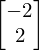

In [150]:
v1 = Matrix([-2,2])
v1

In [152]:
v2 = Matrix([1,1])
v2

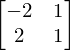

In [153]:
P = Matrix.hstack(v1,v2)
P

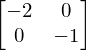

In [155]:
D = matrix_to_rational([[-2,0],[0,-1]])
D

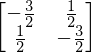

In [156]:
A = P * D * P**(-1)
A

In [158]:
lbd = symbols('lambda')
p = det(A - lbd*eye(2))
factor(p)

In [159]:
print(latex(A))

\left[\begin{matrix}- \frac{3}{2} & \frac{1}{2}\\\frac{1}{2} & - \frac{3}{2}\end{matrix}\right]


In [160]:
print(latex(P))

\left[\begin{matrix}-2 & 1\\2 & 1\end{matrix}\right]


In [161]:
print(latex(P.T*A*P))

\left[\begin{matrix}-16 & 0\\0 & -2\end{matrix}\right]
